## HW Week 12 (#10) - Data fitting with various functions - Due Friday Nov 11, 2022

You will be using the same data "miniDR17.fits" from the TCU Online Week 11:<br>

Remember you need to remove Identified bad data, 
however data that are just bad in one quantity may remain
Use masking to remove any remaining bad values (typically 9999 or -9999 in this file, <b>but remember to remove Outlier!!!!  If you are not sure, ask!!!</b>). 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)


# Monte Carlo-version of 2 parameter Curve Fit that can use BOTH x and Y errors
def mcFit2(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1]):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        slope.append(popt[0])
        y_ints.append(popt[1])
    return (np.median(slope),np.median(y_ints))


# Monte Carlo-version of 3 parameter Curve Fit that can use BOTH x and Y errors
def mcFit3(func, x, y, x_err=0.1, y_err=0.1,p0=[1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

# Monte Carlo-version of 4 parameter Curve Fit that can use BOTH x and Y errors
def mcFit4(func, x, y, x_err=0.1, y_err=0.1, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))
        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 
        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])
    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


In [3]:
# READ IN FITS FILES
star_hdus = fits.open('miniDR17.fits')
star = star_hdus[1].data

star5= star_hdus[1].data
star6= star_hdus[1].data
star7= star_hdus[1].data
star8= star_hdus[1].data
star9= star_hdus[1].data

print(star_hdus[1].columns)
star_hdus.close()

ColDefs(
    name = 'APOGEE_ID'; format = '30A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'TEFF'; format = 'E'
    name = 'TEFF_ERR'; format = 'E'
    name = 'LOGG'; format = 'E'
    name = 'LOGG_ERR'; format = 'E'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'SNR'; format = 'E'
    name = 'VHELIO_AVG'; format = 'E'
    name = 'VERR'; format = 'E'
    name = 'FE_H'; format = 'E'
    name = 'FE_H_ERR'; format = 'E'
    name = 'O_FE'; format = 'E'
    name = 'O_FE_ERR'; format = 'E'
    name = 'NI_FE'; format = 'E'
    name = 'NI_FE_ERR'; format = 'E'
    name = 'NVISTIS'; format = 'J'
    name = 'VSCATTER'; format = 'E'
    name = 'ASPCAPFLAG'; format = 'K'
    name = 'STARFLAG'; format = 'K'
    name = 'EXTRATARG'; format = 'J'
    name = 'GAIA_PARALLAX'; format = 'E'
    name = 'GAIA_PARALLAX_ERROR'; for

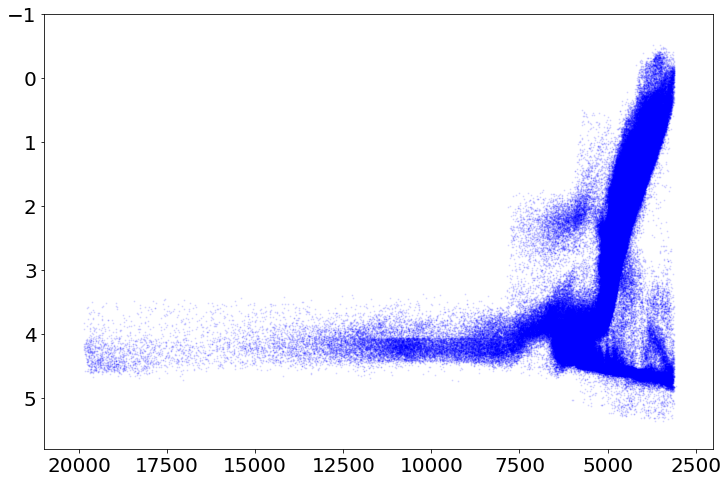

In [4]:
# TWO BITWISE FLAGS FOR BAD DATA - THESE REMOVE IDENTIFIED BAD DATA            
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter((star['TEFF'][good]),star['LOGG'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_xlim(21000,2000)
ax.set_ylim(5.8,-1)

plt.show()

## DATA FIT 3

Fit a linear, polynomial (poly3), and a sigmoid functions and to the following selections of the data:<br>
3. Select stars only with with $GLAT > 60$ <br>
   __Fit Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>

For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: 0.030, 0.019
POLY3: -0.042, -0.084, 0.007, 0.021


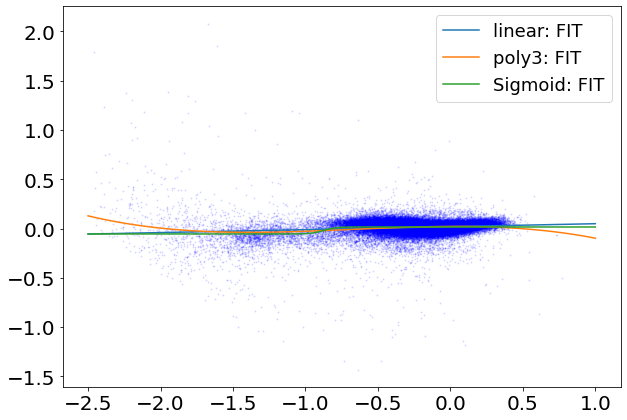

In [6]:
# write you fitting code and plot the results here
badbits= 2**23
suspectbits = 2**16 

star = star[~np.isnan(star['FE_H'])]
star = star[~np.isnan(star['NI_FE'])]


gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)  &\
     (star['GLAT']>60)
good = np.where(gd)[0]

#:INEAR
slope, intercept = mcFit2(linear, star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good], \
                         star['NI_FE_ERR'][good], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')      

#POLY3
cfA, cfB, cfC, cfD = mcFit4(poly3, star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good]/1000, \
                            star['NI_FE_ERR'][good]/1000,p0=[60,0.02,0,0])
print(f'POLY3: {cfA:.3f}, {cfB:.3f}, {cfC:.3f}, {cfD:.3f}')

#def sigmoid(x,a,b,c,d):
 #   return (c/(1 + np.exp(-b*(x-a))) + d)
#SIGMOID
a,b,c,d= mcFit4(sigmoid,star['FE_H'][good], star['NI_FE'][good], star['FE_H_ERR'][good], \
            star['NI_FE_ERR'][good], p0=[.1,1,.1,.01])
              
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)

ax1.scatter(star['FE_H'][good],star['NI_FE'][good],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-2.5,1,100)

ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
ax1.plot(x_plot,poly3(x_plot, cfA, cfB, cfC, cfD), label='poly3: FIT')
ax1.plot(x_plot,sigmoid(x_plot,a,b,c,d),label='Sigmoid: FIT')      
plt.legend(loc='best', fontsize=18)
plt.show()

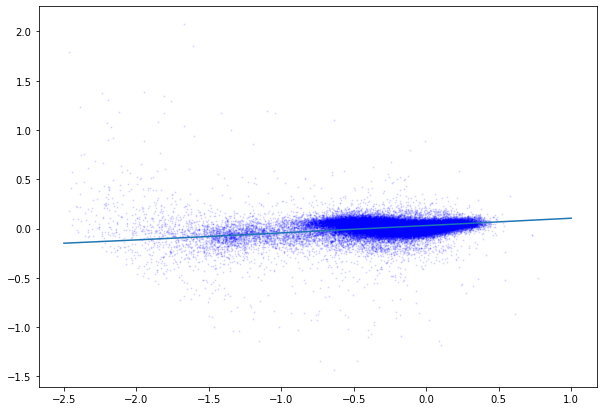

In [77]:
#best fit for sigmoid

#.1,1,.1,.01
a, b, c, d = 0, .3 , 1, -.47

fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.scatter(star['FE_H'][good],star['NI_FE'][good],s=1,c='b',alpha=0.1)
ax1.plot(x_plot,sigmoid(x_plot,a,b,c,d),label='Sigmoid: FIT')      
plt.show()

## DATA FIT 4

Fit  a linear, a logfit, and a polynomial (poly2) functions and to the following selections of the data:<br>
4. Select stars only  with $GLAT < -10$  <br>
   __Fit TEFF,  (TEFF\_ERR)   vs.  (star['J'] - star['K']) with error of (np.sqrt(star['J\_ERR']\*\*2 + star['K\_ERR']\*\*2))__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

[0.         0.40400028 0.73099995 ... 0.65099907 0.9460001  0.27300072]
[0.         0.03182766 0.0815414  ... 0.1569777  0.18298908 0.02920616]
LINEAR: -0.000, 1.634
POLY2: -0.000, 0.000, 0.703


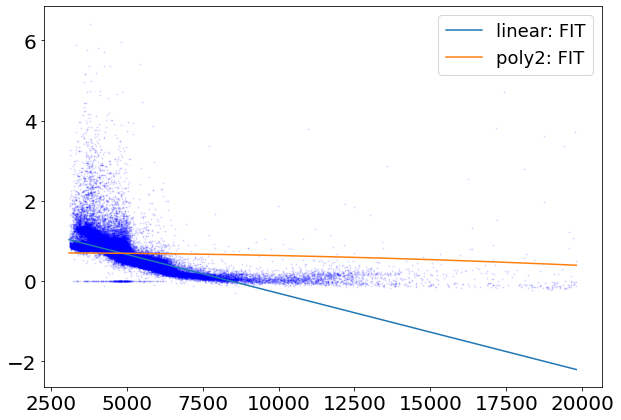

In [15]:
# write you fitting code and plot the results here
badbits= 2**23
suspectbits = 2**16 
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)  &\
     (star['GLAT']<-10)

good = np.where(gd)[0]
star_here = star[good]
# star_here = star_here[~np.isnan(star['TEFF'])]
#star1 = star[~np.isnan(star['NI_FE'])]

star_jk = star_here["J"] - star_here["K"]
# star_jk = star_jk[~np.isnan(star_jk)]

print(star_jk)

star_jk_ERR = np.sqrt((star_here['J_ERR']**2) + (star_here['K_ERR']**2))
# star_jk_ERR = star_jk_ERR[~np.isnan(star_jk_ERR)]
print(star_jk_ERR)


is_nan_err = ~np.isnan(star_jk_ERR)
is_nan_jk = ~np.isnan(star_jk)
is_nan_teff = ~np.isnan(star_here["TEFF"])
total_mask = np.logical_and(is_nan_err, is_nan_jk)
total_mask = np.logical_and(total_mask, is_nan_teff)
star_jk = star_jk[total_mask]
star_jk_ERR = star_jk_ERR[total_mask]
teff = star_here["TEFF"][total_mask]
teff_ERR = star_here["TEFF"][total_mask]


slope, intercept = mcFit2(linear, teff, star_jk, star_here['TEFF_ERR'][total_mask], \
                         star_jk_ERR, p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')


#def logfit(x,a,b,c,d):
 #   return a*np.log(b*x + c) + d

    
    
polyA, polyB, polyC,  = mcFit3(poly2, teff, star_jk, teff_ERR, \
                         star_jk_ERR,p0=[1,2,0])
print(f'POLY2: {polyA:.3f}, {polyB:.3f}, {polyC:.3f}')    
    
    
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

    
ax1.scatter(teff,star_jk,s=1,c='b',alpha=0.1)

x_plot = np.arange(np.min(teff), np.max(teff), 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
ax1.plot(x_plot,poly2(x_plot, polyA, polyB, polyC ), label='poly2: FIT')
plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 5

Fit  a linear, a polynomial (poly3), and a cosfit functions and to the following selections of the data:<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit GLON  vs.  VHEILO\_AVG (VERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

LINEAR: -0.001, -3.966
POLY3: -0.000, 0.014, -1.781,27.969
COSFIT: 49.824, -0.023, -21.128,0.584


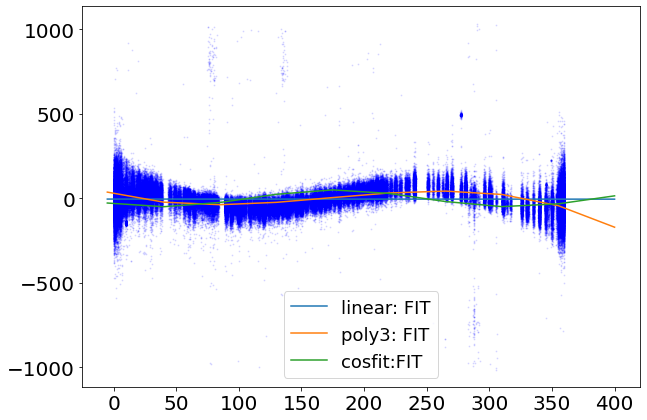

In [55]:
badbits= 2**23
suspectbits = 2**16 

star5=star5[~np.isnan(star5['GLON'])]
star5=star5[~np.isnan(star5['VHELIO_AVG'])]
star5=star5[~np.isnan(star5['VERR'])]

gd5 = (np.bitwise_and(star5['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star5['starflag'], suspectbits) == 0)  &\
     ((-10<star5["GLAT"]) & (10>star5["GLAT"]))
good5 = np.where(gd5)[0]


#LINEAR
slope, intercept = mcFit2(linear, star5['GLON'][good5], star5['VHELIO_AVG'][good5], star5['GLON'][good5]/1000, \
                         star5['VERR'][good5], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')    

#POLY 3    
polyA5, polyB5, polyC5,polyD5  = mcFit4(poly3, star5['GLON'][good5], star5['VHELIO_AVG'][good5], star5['GLON'][good5]/1000, \
                         star5['VERR'][good5], p0=[600,1,1,1])
print(f'POLY3: {polyA5:.3f}, {polyB5:.3f}, {polyC5:.3f},{polyD5:.3f}')    

#COSFIT
cfA5, cfB5,cfC5,cfD5 = mcFit4(cosfit, star5["GLON"][good5], star5["VHELIO_AVG"][good5], star5["GLON"][good5]/1000,\
                             star5['VERR'][good5]/1000,p0=[60,0,.02,0])
print(f'COSFIT: {cfA5:.3f}, {cfB5:.3f}, {cfC5:.3f},{cfD5:.3f}')

  
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

ax1.scatter(star5['GLON'][good5],star5["VHELIO_AVG"][good5],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-5,400, 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
ax1.plot(x_plot,poly3(x_plot, polyA5, polyB5, polyC5,polyD5 ), label='poly3: FIT')
ax1.plot(x_plot,cosfit(x_plot,cfA5,cfB5,cfC5,cfD5), label='cosfit:FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 6

Fit a linear, an exponential, and a polynomial (poly3) functions and to the following selections of the data:<br>
6. __Fit NVISTIS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [5]:
badbits= 2**23
suspectbits = 2**16 

star6=star6[~np.isnan(star6['NVISTIS'])]
star6=star6[~np.isnan(star6['VSCATTER'])]
star6=star6[~np.isnan(star6['VERR'])]

gd6 = (np.bitwise_and(star6['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star6['starflag'], suspectbits) == 0)  &\
     ((1<=star6["NVISTIS"]))
good6 = np.where(gd6)[0]


#LINEAR
slope, intercept = mcFit2(linear, star6['NVISTIS'][good6], star6['VSCATTER'][good6], star6['NVISTIS'][good6]/1000, \
                         star6['VERR'][good6], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')    

#POLY 3    
polyA6, polyB6, polyC6 ,polyD6 = mcFit4(poly3, star6['NVISTIS'][good6], star6['VSCATTER'][good6], star6['NVISTIS'][good6]/1000, \
                         star6['VERR'][good6], p0=[1,1,1,1])
print(f'POLY3: {polyA6:.3f}, {polyB6:.3f}, {polyC6:.3f},{polyD6:.3f}')    

#def exponential(x,a,b,c,d):
 #   return a*np.exp(b*x + c) + d

exA6, exB6, exC6 ,exD6 = mcFit4(exponential, star6['NVISTIS'][good6], star6['VSCATTER'][good6], star6['NVISTIS'][good6]/1000, \
                         star6['VERR'][good6], p0=[0,0,0,0])
print(f'POLY3: {polyA6:.3f}, {polyB6:.3f}, {polyC6:.3f},{polyD6:.3f}')   
    
    
    
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

    
ax1.scatter(star6['NVISTIS'][good6],star6["VSCATTER"][good6],s=1,c='b',alpha=0.1)

x_plot = np.arange(np.min("NVISTIS"), np.max("NVISTIS"), 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA6, polyB6, polyC6 ,polyD6 ), label='poly3: FIT')

ax1.plot(x_plot,exponential(x_plot,exA6,exB6,exC6,exD6), label='exponential:FIT')
plt.legend(loc='best', fontsize=18)
plt.show()


LINEAR: 0.107, 0.453
POLY3: 0.000, -0.019, 0.381,-0.110


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

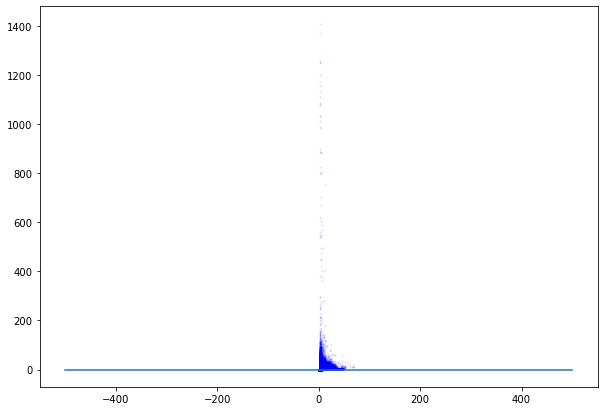

In [53]:
#tried to find exponential parameters, I have memory issues where it takes so long to run and touble shoot

exA6, exB6, exC6 ,exD6 = mcFit4(exponential, star6['NVISTIS'][good6], star6['VSCATTER'][good6], star6['NVISTIS'][good6]/1000, \
                         star6['VERR'][good6], p0=[0,0,0,0])
print(f'POLY3: {polyA6:.3f}, {polyB6:.3f}, {polyC6:.3f},{polyD6:.3f}') 



fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.scatter(star['FE_H'][good],star['NI_FE'][good],s=1,c='b',alpha=0.1)
ax1.plot(x_plot,sigmoid(x_plot,a),label='Sigmoid: FIT')      
plt.show()

## DATA FIT 7

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
7. __Fit RA  vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
badbits= 2**23
suspectbits = 2**16 

star7=star7[~np.isnan(star7['RA'])]
star7=star7[~np.isnan(star7['GAIA_PMRA'])]
star7=star7[~np.isnan(star7['GAIA_PMRA_ERROR'])]

gd7 = (np.bitwise_and(star7['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star7['starflag'], suspectbits) == 0)  &\
     ((1<=star7["RA"]))
good7 = np.where(gd7)[0]


#LINEAR
slope, intercept = mcFit2(linear, star7['RA'][good7], star7['GAIA_PMRA'][good7], star7['RA'][good7]/1000, \
                         star7['GAIA_PMRA_ERROR'][good7], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')    

#POLY 2
plyA7, plyB7, plyC7  = mcFit3(poly2, star7['RA'][good7], star7['GAIA_PMRA'][good7], star7['RA'][good7]/1000, \
                         star7['GAIA_PMRA_ERROR'][good7], p0=[1,1,1])
print(f'POLY2: {plyA7:.3f}, {plyB7:.3f}, {plyC7:.3f}')  

#POLY 3    
polyA7, polyB7, polyC7 ,polyD7 = mcFit4(poly3, star7['RA'][good7], star7['GAIA_PMRA'][good7], star7['RA'][good7]/1000, \
                         star7['GAIA_PMRA_ERROR'][good7], p0=[1,1,1,1])
print(f'POLY3: {polyA7:.3f}, {polyB7:.3f}, {polyC7:.3f},{polyD7:.3f}')    
    
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

    
ax1.scatter(star7['RA'][good7],star7["GAIA_PMRA"][good7],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-5,400 , 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly2(x_plot, plyA7, plyB7, plyC7 ), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA7, polyB7, polyC7 ,polyD7 ), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR: -0.019, 0.591


## DATA FIT 8

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
8. select stars with only TEFF < 6000 and LOGG < 3<br>
__Fit TEFF (TEFF_ERR)  vs.  LOGG (LOGG_ERR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
#RUN

badbits= 2**23
suspectbits = 2**16 

star8=star8[~np.isnan(star8['TEFF'])]
star8=star8[~np.isnan(star8['LOGG'])]
star8=star8[~np.isnan(star8['TEFF_ERR'])]
star8=star8[~np.isnan(star8['LOGG_ERR'])]

gd8 = (np.bitwise_and(star8['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star8['starflag'], suspectbits) == 0)  &\
     ((6000 > star8["TEFF"]) & (3 < star8["LOGG"]))
good8 = np.where(gd8)[0]


#LINEAR
slope, intercept = mcFit2(linear, star8['TEFF'][good8], star8['LOGG'][good8], star8['TEFF_ERR'][good8]/1000, \
                         star8['LOGG_ERR'][good8], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')    

#POLY 2
plyA8, plyB8, plyC8  = mcFit3(poly2, star8['TEFF'][good8], star8['LOGG'][good8], star8['TEFF_ERR'][good8]/1000, \
                         star8['LOGG_ERR'][good8], p0=[1,1,1])
print(f'POLY2: {plyA8:.3f}, {plyB8:.3f}, {plyC8:.3f}')  

#POLY 3    
polyA8, polyB8, polyC8 ,polyD8 = mcFit4(poly3, star8['TEFF'][good8], star8['LOGG'][good8], star8['TEFF_ERR'][good8]/1000, \
                         star8['LOGG_ERR'][good8], p0=[1,1,1,1])
print(f'POLY3: {polyA8:.3f}, {polyB8:.3f}, {polyC8:.3f},{polyD8:.3f}')    
    
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

    
ax1.scatter(star8['TEFF'][good8],star8["LOGG"][good8],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-5,400 , 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly2(x_plot, plyA8, plyB8, plyC8 ), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA8, polyB8, polyC8 ,polyD8 ), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()

## DATA FIT 9

Fit  a linear and a polynomial (poly2 AND poly3) functions and to the following selections of the data:<br>
9. __Fit GAIA_PARALLAX (GAIA_PARALLAX_ERROR) vs.  GAIA_PMRA (GAIA_PMRA_ERROR)__<br>
<br>
For this fit of the above selection:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

In [ ]:
#RUNNN

badbits= 2**23
suspectbits = 2**16 

star9=star9[~np.isnan(star9['GAIA_PARALLAX'])]
star9=star9[~np.isnan(star9['GAIA_PMRA'])]
star9=star9[~np.isnan(star9['GAIA_PARALLAX_ERROR'])]
star9=star9[~np.isnan(star9['GAIA_PMRA_ERROR'])]

gd9 = (np.bitwise_and(star9['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star9['starflag'], suspectbits) == 0) 
good9 = np.where(gd9)[0]


#LINEAR
slope, intercept = mcFit2(linear, star9['GAIA_PARALLAX'][good9], star9['GAIA_PMRA'][good9], star9['GAIA_PARALLAX_ERROR'][good9]/1000, \
                         star9['GAIA_PMRA_ERROR'][good9], p0=[0,0])
print(f'LINEAR: {slope:.3f}, {intercept:.3f}')    

#POLY 2
plyA9, plyB9, plyC9  = mcFit3(poly2, star9['GAIA_PARALLAX'][good9], star9['GAIA_PMRA'][good9], star9['GAIA_PARALLAX_ERROR'][good9]/1000, \
                         star9['GAIA_PMRA_ERROR'][good9], p0=[1,1,1])
print(f'POLY2: {plyA9:.3f}, {plyB9:.3f}, {plyC9:.3f}')  

#POLY 3    
polyA9, polyB9, polyC9 ,polyD9 = mcFit4(poly3, star9['GAIA_PARALLAX'][good9], star9['GAIA_PMRA'][good9], star9['GAIA_PARALLAX_ERROR'][good9]/1000, \
                         star9['GAIA_PMRA_ERROR'][good9], p0=[1,1,1,1])
print(f'POLY3: {polyA9:.3f}, {polyB9:.3f}, {polyC9:.3f},{polyD9:.3f}')    
    
fig1 = plt.figure(figsize=(10,7))
ax1 = fig1.add_subplot(111)
ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)    

    
ax1.scatter(star9['GAIA_PARALLAX'][good9],star9["GAIA_PMRA"][good9],s=1,c='b',alpha=0.1)

x_plot = np.linspace(-5,400 , 10)

#a, b, c, d = mcFit4(Logfit, star['TEFF'][good], star['JK'][good])
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')

ax1.plot(x_plot,poly2(x_plot, plyA9, plyB9, plyC9 ), label='poly2: FIT')

ax1.plot(x_plot,poly3(x_plot, polyA9, polyB9, polyC9 ,polyD9 ), label='poly3: FIT')

plt.legend(loc='best', fontsize=18)
plt.show()